## Set up environment

In [1]:
# Set up environment
import warnings;
warnings.filterwarnings('ignore');
from IPython.core.interactiveshell import InteractiveShell;
InteractiveShell.ast_node_interactivity = "all";
import pandas as pd
import nibabel as nib
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import scipy.stats as stats
from scipy.stats import permutation_test as p
import statistics
from utils import get_data

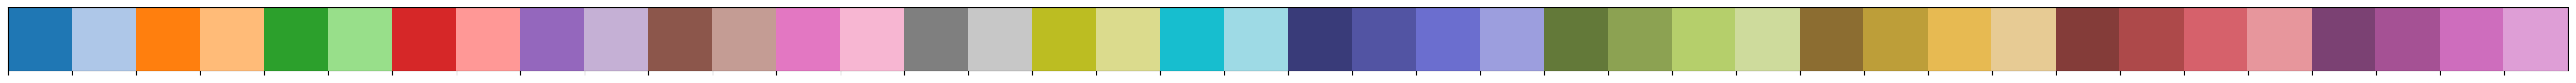

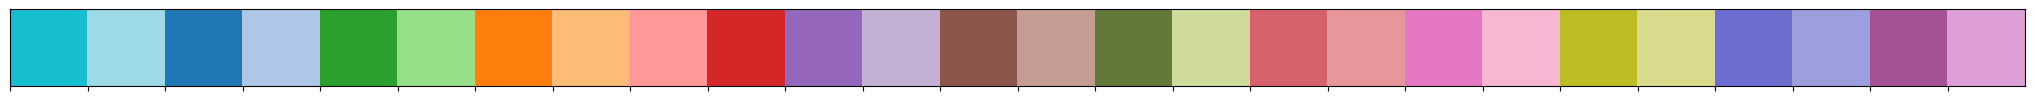

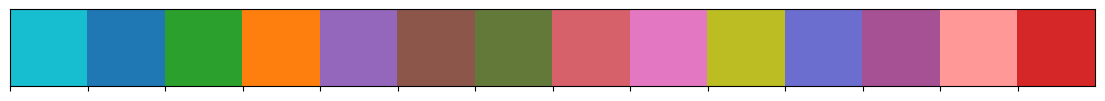

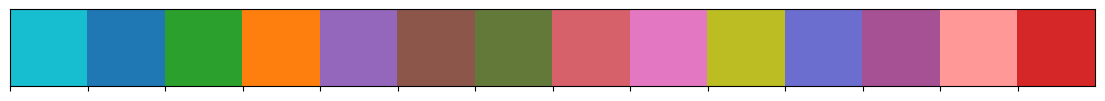

In [2]:
#plotting parameters, these will be the same for all plots

bundles = ['AFL', 'AFR', 'ATRL', 'ATRR', 'CCL', 'CCR', 'CSL', 'CSR', 'FcMi', 'FcMa', 'IFOFL', 'IFOFR', 'ILFL', 'ILFR',
                  'MLFL', 'MLFR', 'ORL', 'ORR', 'SLFL', 'SLFR', 'UNCL', 'UNCR', 'VOFL', 'VOFR', 'pAFL', 'pAFR']
rightBundles = ['AFR', 'ATRR', 'CCR', 'CSR', 'FcMi', 'FcMa', 'IFOFR', 'ILFR', 'MLFR', 'ORR', 'pAFR', 'SLFR', 'UNCR', 'VOFR']
leftBundles = ['AFL', 'ATRL', 'CCL', 'CSL', 'FcMi', 'FcMa', 'IFOFL', 'ILFL', 'MLFL', 'ORL', 'pAFL', 'SLFL', 'UNCL', 'VOFL']


tractPosHorz = {'AF': (0,0), 'ATR': (0, 1), 'CC': (0, 2), 'CS': (0, 3),
            'IFOF':(1,0), 'ILF':(1,1), 'MLF':(1,2), 'OR': (1,3),
            'SLF': (2, 0),  'UNC':(2,1), 'VOF': (2, 2), 'pAF': (2,3),
            'FcMi': (3, 1), 'FcMa': (3, 2)};

tracts=['AF', 'ATR', 'CC', 'CS', 'IFOF', 'ILF', 'MLF', 'OR', 'SLF', 'UNC', 'VOF', 'pAF', 'FcMi', 'FcMa']
colors=['cyan', 'blue', 'green', 'orange', 'purple', 'brown', 'olive', 'coral', 'fuchsia', 'yellow', 'indigo', 'violet', 'salmon', 'red']

color_list_all=sns.color_palette("tab20")+sns.color_palette("tab20b")
color_list_complete=color_list_all
color_list_chosen=color_list_all[18:20]
color_list_chosen.extend(color_list_all[0:2])
color_list_chosen.extend(color_list_all[4:6])
color_list_chosen.extend(color_list_all[2:4])
color_list_chosen.extend(color_list_all[7:8])
color_list_chosen.extend(color_list_all[6:7])
color_list_chosen.extend(color_list_all[8:10])
color_list_chosen.extend(color_list_all[10:12])
color_list_chosen.extend(color_list_all[24:25])
color_list_chosen.extend(color_list_all[27:28])
color_list_chosen.extend(color_list_all[34:35])
color_list_chosen.extend(color_list_all[35:36])
color_list_chosen.extend(color_list_all[12:14])
color_list_chosen.extend(color_list_all[16:18])
color_list_chosen.extend(color_list_all[22:23])
color_list_chosen.extend(color_list_all[23:24])
color_list_chosen.extend(color_list_all[37:38])
color_list_chosen.extend(color_list_all[39:40])

sns.palplot(color_list_all)
sns.palplot(color_list_chosen)
color_list_all=color_list_chosen
color_order=[19, 18, 1, 0, 5, 4, 3, 2, 7, 6, 9, 8, 11, 10, 15, 14, 21, 20, 25, 24, 13, 12, 17, 16, 23, 22]

color_list_nohemis=sns.color_palette("tab20")+sns.color_palette("tab20b")
color_list_complete_nohemis=color_list_nohemis
color_list_chosen_nohemis=color_list_nohemis[18:19]
color_list_chosen_nohemis.extend(color_list_nohemis[0:1])
color_list_chosen_nohemis.extend(color_list_nohemis[4:5])
color_list_chosen_nohemis.extend(color_list_nohemis[2:3])
color_list_chosen_nohemis.extend(color_list_nohemis[8:9])
color_list_chosen_nohemis.extend(color_list_nohemis[10:11])
color_list_chosen_nohemis.extend(color_list_nohemis[24:25])
color_list_chosen_nohemis.extend(color_list_nohemis[34:35])
color_list_chosen_nohemis.extend(color_list_nohemis[12:13])
color_list_chosen_nohemis.extend(color_list_nohemis[16:17])
color_list_chosen_nohemis.extend(color_list_nohemis[22:23])
color_list_chosen_nohemis.extend(color_list_nohemis[37:38])
color_list_chosen_nohemis.extend(color_list_nohemis[7:8])
color_list_chosen_nohemis.extend(color_list_nohemis[6:7])
sns.palplot(color_list_chosen_nohemis)

color_order2=[19, 18, 5, 4, 9, 8, 11, 10, 15, 14, 21, 20, 25, 24, 13, 12, 17, 16, 23, 22, 7, 6]

color_list_3=sns.color_palette("tab20")+sns.color_palette("tab20b")
color_list_complete3=color_list_3
color_list_chosen3=color_list_3[18:19]
color_list_chosen3.extend(color_list_3[0:1])
color_list_chosen3.extend(color_list_3[4:5])
color_list_chosen3.extend(color_list_3[2:3])
color_list_chosen3.extend(color_list_3[8:9])
color_list_chosen3.extend(color_list_3[10:11])
color_list_chosen3.extend(color_list_3[24:25])
color_list_chosen3.extend(color_list_3[34:35])
color_list_chosen3.extend(color_list_3[12:13])
color_list_chosen3.extend(color_list_3[16:17])
color_list_chosen3.extend(color_list_3[22:23])
color_list_chosen3.extend(color_list_3[37:38])
color_list_chosen3.extend(color_list_3[7:8])
color_list_chosen3.extend(color_list_3[6:7])
sns.palplot(color_list_chosen3)


color_order3=[19, 1, 5, 3, 9, 11, 25, 35, 13, 17, 23, 38, 8, 7]

In [3]:
get_data()

In [4]:
AveSubT1wT2wBothWeAve=pd.read_csv('./inputData/GMandWMT1wT2ws.csv', index_col=None)
T1wT2wBothWeAve=pd.read_csv("./inputData/GMandWMT1wT2wSubjects.csv", index_col=None)
R1BothWeAveTract=pd.read_csv("./inputData/R1WMandGM.csv", index_col=None)
R1BothWeAveSubject=pd.read_csv("./inputData/R1BothSubjects.csv", index_col=None)

## T1w/T2w

PearsonRResult(statistic=np.float64(0.741443013554566), pvalue=np.float64(1.4655932502800815e-05))

Text(0.5, 28.999999999999986, 'T1w/T2w in GM')

Text(29.0, 0.5, 'T1w/T2w in WM')

(array([1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 ]),
 [Text(1.05, 0, '1.05'),
  Text(1.1, 0, '1.10'),
  Text(1.1500000000000001, 0, '1.15'),
  Text(1.2000000000000002, 0, '1.20'),
  Text(1.25, 0, '1.25'),
  Text(1.3, 0, '1.30'),
  Text(1.35, 0, '1.35'),
  Text(1.4000000000000001, 0, '1.40')])

(array([0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6]),
 [Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.2, '1.2'),
  Text(0, 1.4000000000000001, '1.4'),
  Text(0, 1.6, '1.6')])

Text(0.5, 1.0, 'Mean Across Subjects')

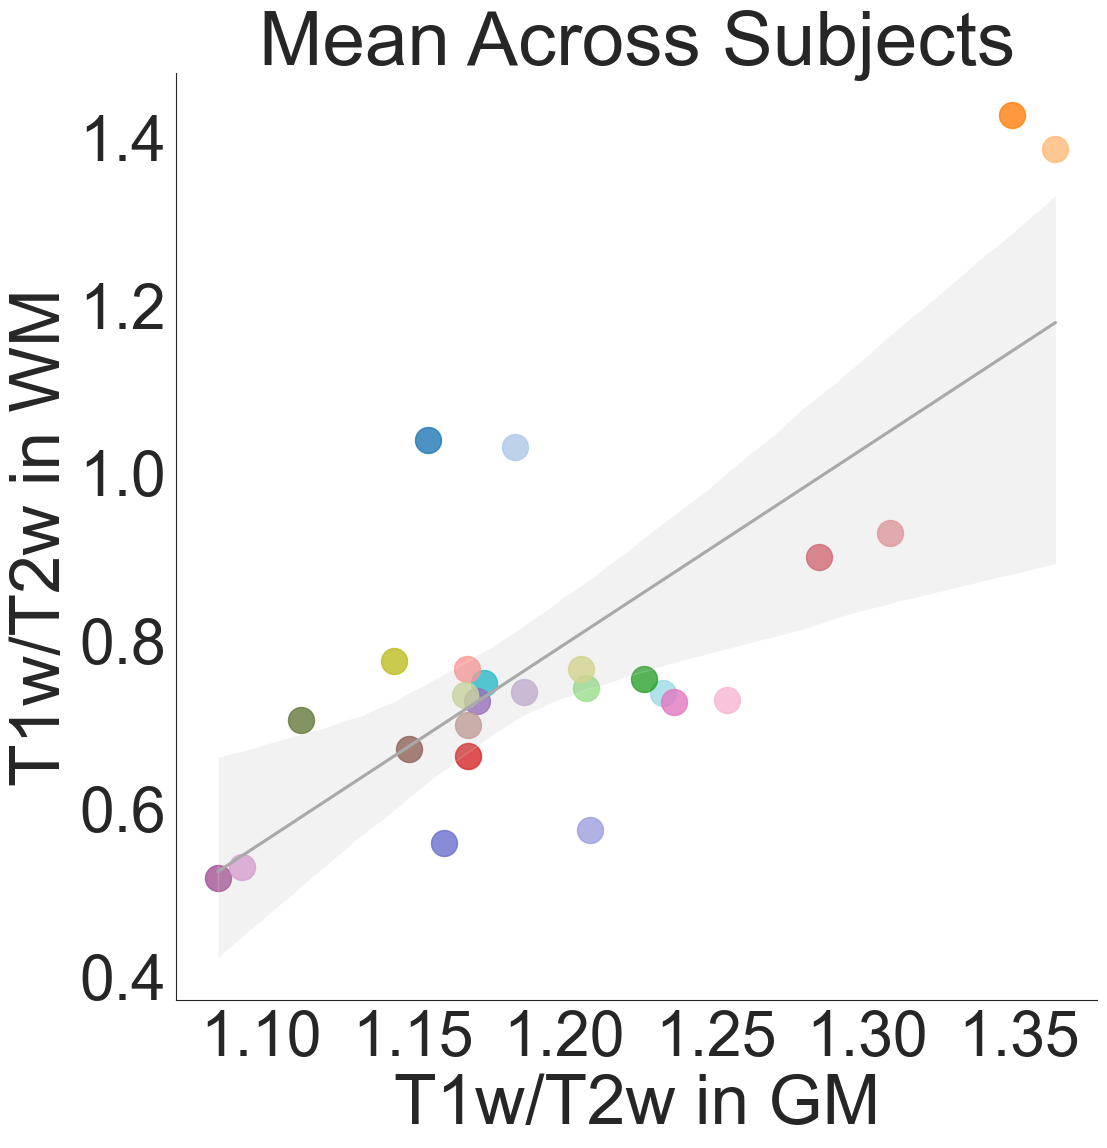

In [5]:
#this generates fig 2A in the main manuscript

sns.set_style('white');
fig1=sns.lmplot(
    data=AveSubT1wT2wBothWeAve, x='WeAvGMT1wT2w', y="t1wt2w", hue="tractID", scatter_kws={"s": 350}, height=10, fit_reg=False, legend=False, palette=color_list_chosen
)
fig1=sns.regplot(data=AveSubT1wT2wBothWeAve, x='WeAvGMT1wT2w', y="t1wt2w", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "darkgrey"})
scipy.stats.pearsonr(AveSubT1wT2wBothWeAve['WeAvGMT1wT2w'], AveSubT1wT2wBothWeAve['t1wt2w'])
plt.xlabel("T1w/T2w in GM", fontsize=50)
plt.ylabel("T1w/T2w in WM", fontsize=50)
plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
fig1.set_title('Mean Across Subjects', fontsize=55)

#os.makedirs('./figures',exist_ok=True)
plt.savefig('./figures/T1wT2w_MyelinGMvsMyelinWM.png', dpi=600, bbox_inches = "tight")

In [6]:
# Compute Pearson r, p, and r² for each subject
results = []
for sub in T1wT2wBothWeAve['subjectID']:
    sub_data = T1wT2wBothWeAve[T1wT2wBothWeAve['subjectID'] == sub]
    r, p_val = stats.pearsonr(sub_data['WeAvGMT1wT2w'], sub_data['t1wt2w'])
    results.append({
        'subjectID': sub,
        'r2': r**2,
        'p': p_val
    })

# Convert to DataFrame
df_stats = pd.DataFrame(results)
df_stats.to_csv('./outputData/SubjectsStatsT1wT2w.csv', index=False)
# Output top-level stats
best_subject = df_stats.loc[df_stats['r2'].idxmax()]
worst_subject = df_stats.loc[df_stats['r2'].idxmin()]
mean_r2 = df_stats['r2'].mean()
mean_p = df_stats['p'].mean()
significant_count = (df_stats['p'] < 0.05).sum()
total_subjects = df_stats['p'].count()

# Display results
print("Best subject:\n", best_subject)
print("Worst subject:\n", worst_subject)
print("Mean p:", mean_p)
print("Mean r2:", mean_r2)
print("Subjects with p < 0.05:", significant_count)
print("Total subjects:", total_subjects)

Best subject:
 subjectID      sub161
r2           0.679218
p                 0.0
Name: 4160, dtype: object
Worst subject:
 subjectID      sub236
r2           0.017455
p            0.519981
Name: 6110, dtype: object
Mean p: 0.008433835662080122
Mean r2: 0.42161210149613076
Subjects with p < 0.05: 6890
Total subjects: 7098


In [7]:
# Use the pandas Series directly for convenience
r2_values = df_stats['r2']

# Compute and print summary statistics
print(f"Mean r²:      {r2_values.mean():.4f}")
print(f"Median r²:    {r2_values.median():.4f}")

try:
    mode_r2 = statistics.mode(r2_values)
    print(f"Mode r²:      {mode_r2:.4f}")
except statistics.StatisticsError:
    print("Mode r²:      No unique mode found")

print(f"Std Dev r²:   {r2_values.std():.4f}")
print(f"Variance r²:  {r2_values.var():.4f}")

# Range function (revised for clarity)
def describe_range(series):
    min_val = series.min()
    max_val = series.max()
    value_range = max_val - min_val
    return min_val, max_val, value_range

r2_min, r2_max, r2_range = describe_range(r2_values)
print(f"Range r²:     min={r2_min:.4f}, max={r2_max:.4f}, range={r2_range:.4f}")

Mean r²:      0.4216
Median r²:    0.4272
Mode r²:      0.5239
Std Dev r²:   0.1317
Variance r²:  0.0173
Range r²:     min=0.0175, max=0.6792, range=0.6618


PearsonRResult(statistic=np.float64(0.8241467736669307), pvalue=np.float64(2.2816274134454112e-07))

Text(0.5, 28.999999999999986, 'T1w/T2w in GM')

Text(29.0, 0.5, 'T1w/T2w in WM')

(array([0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8]),
 [Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.2, '1.2'),
  Text(0, 1.4000000000000001, '1.4'),
  Text(0, 1.6, '1.6'),
  Text(0, 1.8, '1.8')])

([<matplotlib.axis.XTick at 0x2b5a75250>,
 [Text(1.1, 0, '1.1'),
  Text(1.2, 0, '1.2'),
  Text(1.3, 0, '1.3'),
  Text(1.4, 0, '1.4')])

Text(0.5, 1.0, 'High Correlation')

PearsonRResult(statistic=np.float64(0.13211901348945396), pvalue=np.float64(0.5199807343486165))

Text(0.5, 28.999999999999986, 'T1w/T2w in GM')

Text(29.0, 0.5, 'T1w/T2w in WM')

(array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 [Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9000000000000001, '0.9'),
  Text(0, 1.0, '1.0')])

([<matplotlib.axis.XTick at 0x2b5ae16d0>,
 [Text(1.0, 0, '1.00'),
  Text(1.05, 0, '1.05'),
  Text(1.1, 0, '1.10'),
  Text(1.15, 0, '1.15'),
  Text(1.2, 0, '1.20')])

Text(0.5, 1.0, 'Low Correlation')

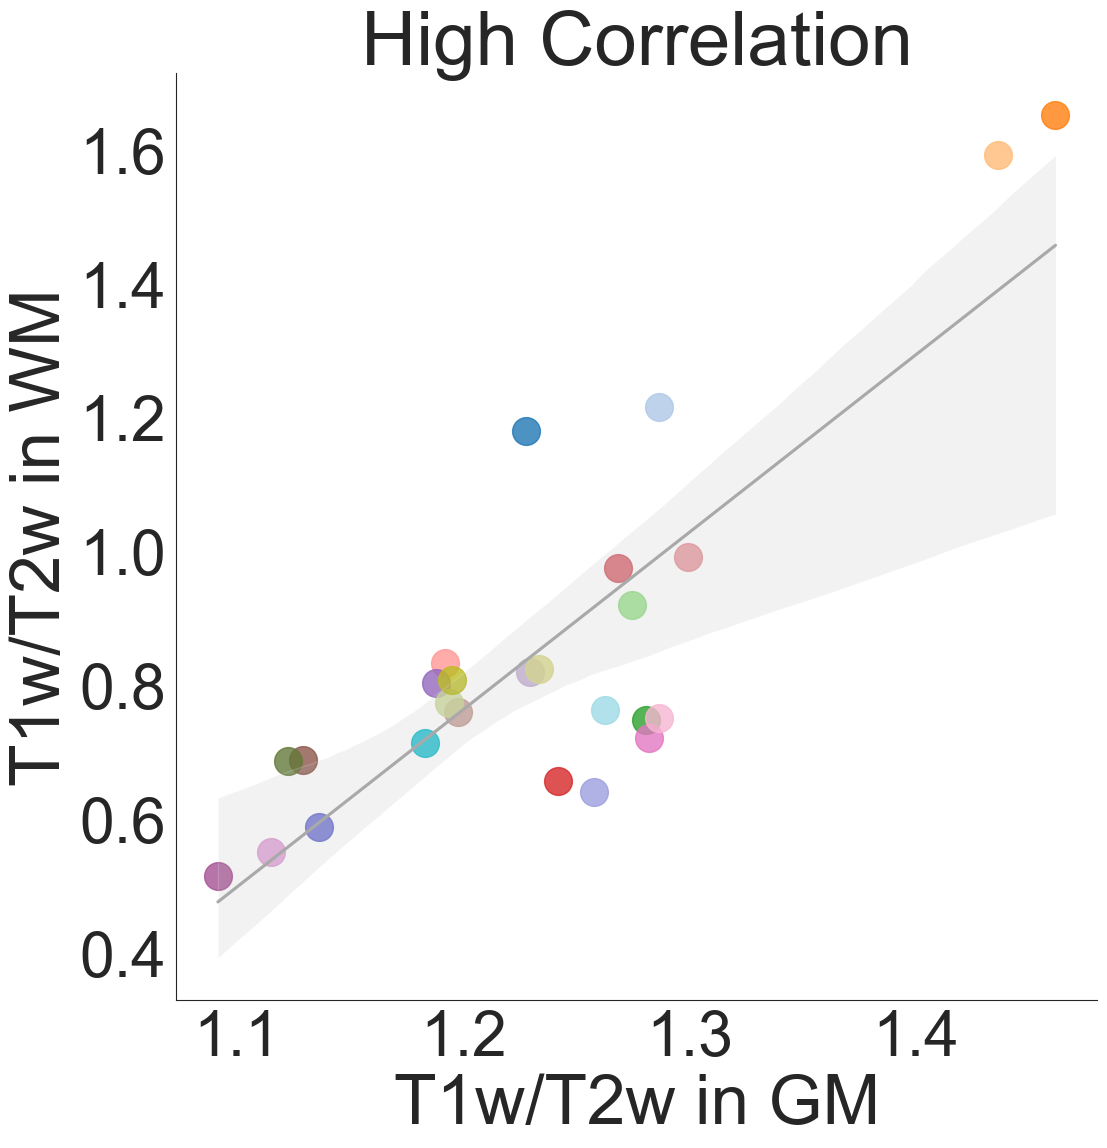

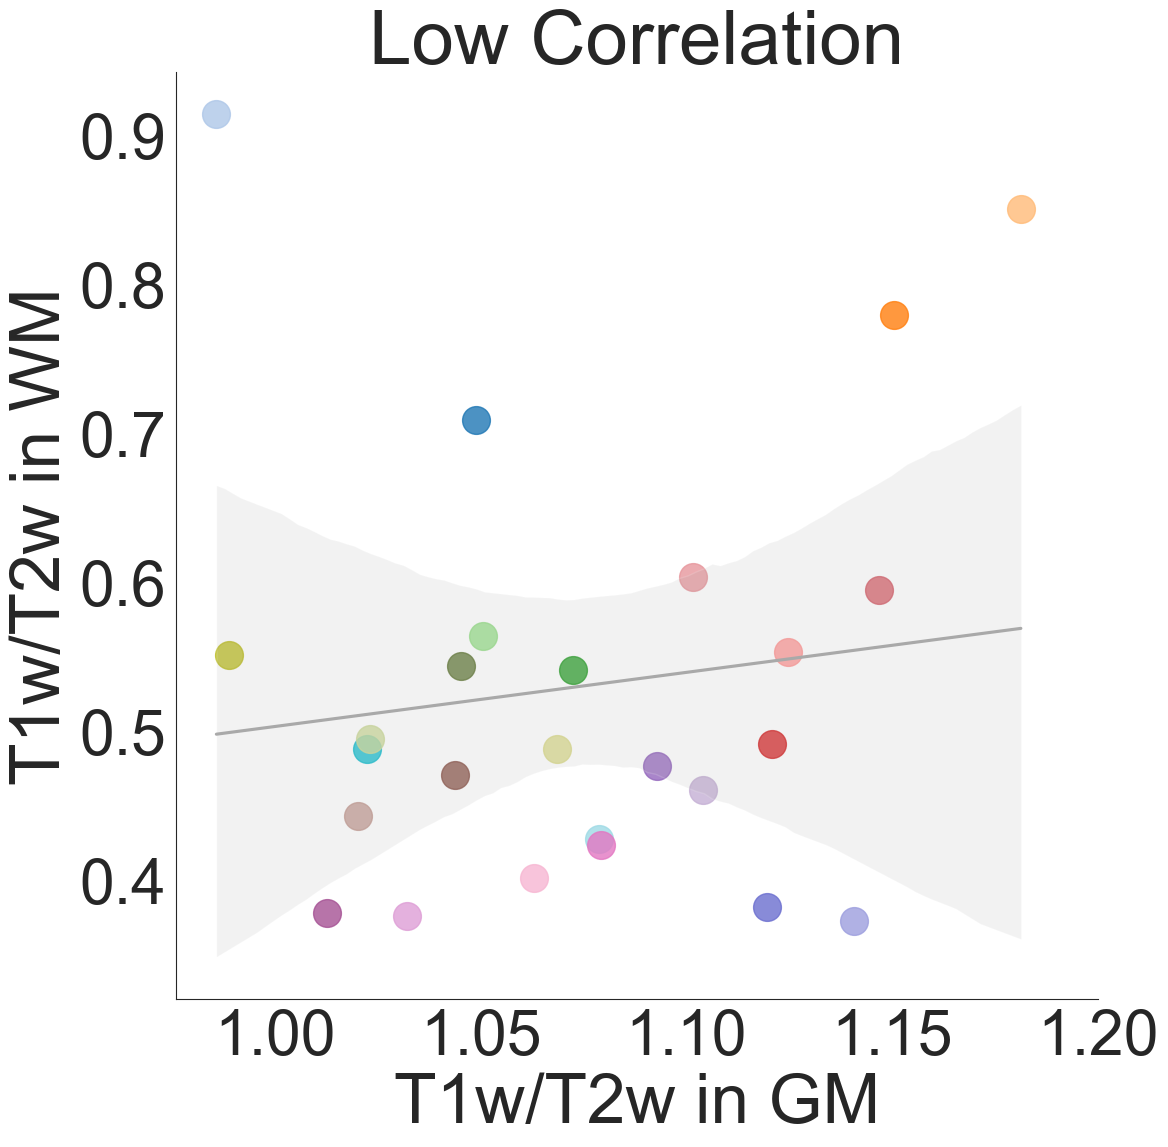

In [8]:
#Plot example subjects

#Highest r²
DataSub1=T1wT2wBothWeAve[(T1wT2wBothWeAve['subjectID']=='sub161')]
sns.set_style('white');
fig1=sns.lmplot(
    data=DataSub1, x='WeAvGMT1wT2w', y="t1wt2w", hue="tractID", scatter_kws={"s": 400}, height=10, fit_reg=False, legend=False, palette=color_list_chosen
)
fig1=sns.regplot(data=DataSub1, x='WeAvGMT1wT2w', y="t1wt2w", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "darkgrey"})
scipy.stats.pearsonr(DataSub1['WeAvGMT1wT2w'], DataSub1['t1wt2w'])
plt.xlabel("T1w/T2w in GM", fontsize=50)
plt.ylabel("T1w/T2w in WM", fontsize=50)
plt.yticks(fontsize=45)
plt.xticks([1.10, 1.20, 1.30, 1.40], fontsize=45)
fig1.set_title('High Correlation', fontsize=55)
plt.savefig('./figures/T1wT2w_MyelinGMvsMyelinWM_HighCorr.png', dpi=600, bbox_inches = "tight")

#Lowest r²
DataSub2=T1wT2wBothWeAve[(T1wT2wBothWeAve['subjectID']=='sub236')]
sns.set_style('white');
fig1=sns.lmplot(
    data=DataSub2, x='WeAvGMT1wT2w', y="t1wt2w", hue="tractID", scatter_kws={"s": 400}, height=10, fit_reg=False, legend=False, palette=color_list_chosen
)
fig1=sns.regplot(data=DataSub2, x='WeAvGMT1wT2w', y="t1wt2w", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "darkgrey"})
scipy.stats.pearsonr(DataSub2['WeAvGMT1wT2w'], DataSub2['t1wt2w'])
plt.xlabel("T1w/T2w in GM", fontsize=50)
plt.ylabel("T1w/T2w in WM", fontsize=50)
plt.yticks(fontsize=45)
plt.xticks([1.00, 1.05, 1.1, 1.15, 1.2],fontsize=45)
fig1.set_title('Low Correlation', fontsize=55)
plt.savefig('./figures/T1wT2w_MyelinGMvsMyelinWM_LowCorr.png', dpi=600, bbox_inches = "tight")

## R1

PearsonRResult(statistic=np.float64(0.5697661253601046), pvalue=np.float64(0.002377921631733524))

Text(0.5, 29.140624999999986, 'R1 in GM [s$^{-1}$]')

Text(21.375, 0.5, 'R1 in WM [s$^{-1}$]')

([<matplotlib.axis.XTick at 0x2b5c2cb10>,
 [Text(0.44, 0, '0.44'),
  Text(0.45, 0, '0.45'),
  Text(0.46, 0, '0.46'),
  Text(0.47, 0, '0.47'),
  Text(0.48, 0, '0.48')])

(array([0.4 , 0.42, 0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56]),
 [Text(0, 0.4, '0.40'),
  Text(0, 0.42000000000000004, '0.42'),
  Text(0, 0.44, '0.44'),
  Text(0, 0.46, '0.46'),
  Text(0, 0.48000000000000004, '0.48'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.52, '0.52'),
  Text(0, 0.54, '0.54'),
  Text(0, 0.56, '0.56')])

Text(0.5, 1.0, 'Mean Across Subjects')

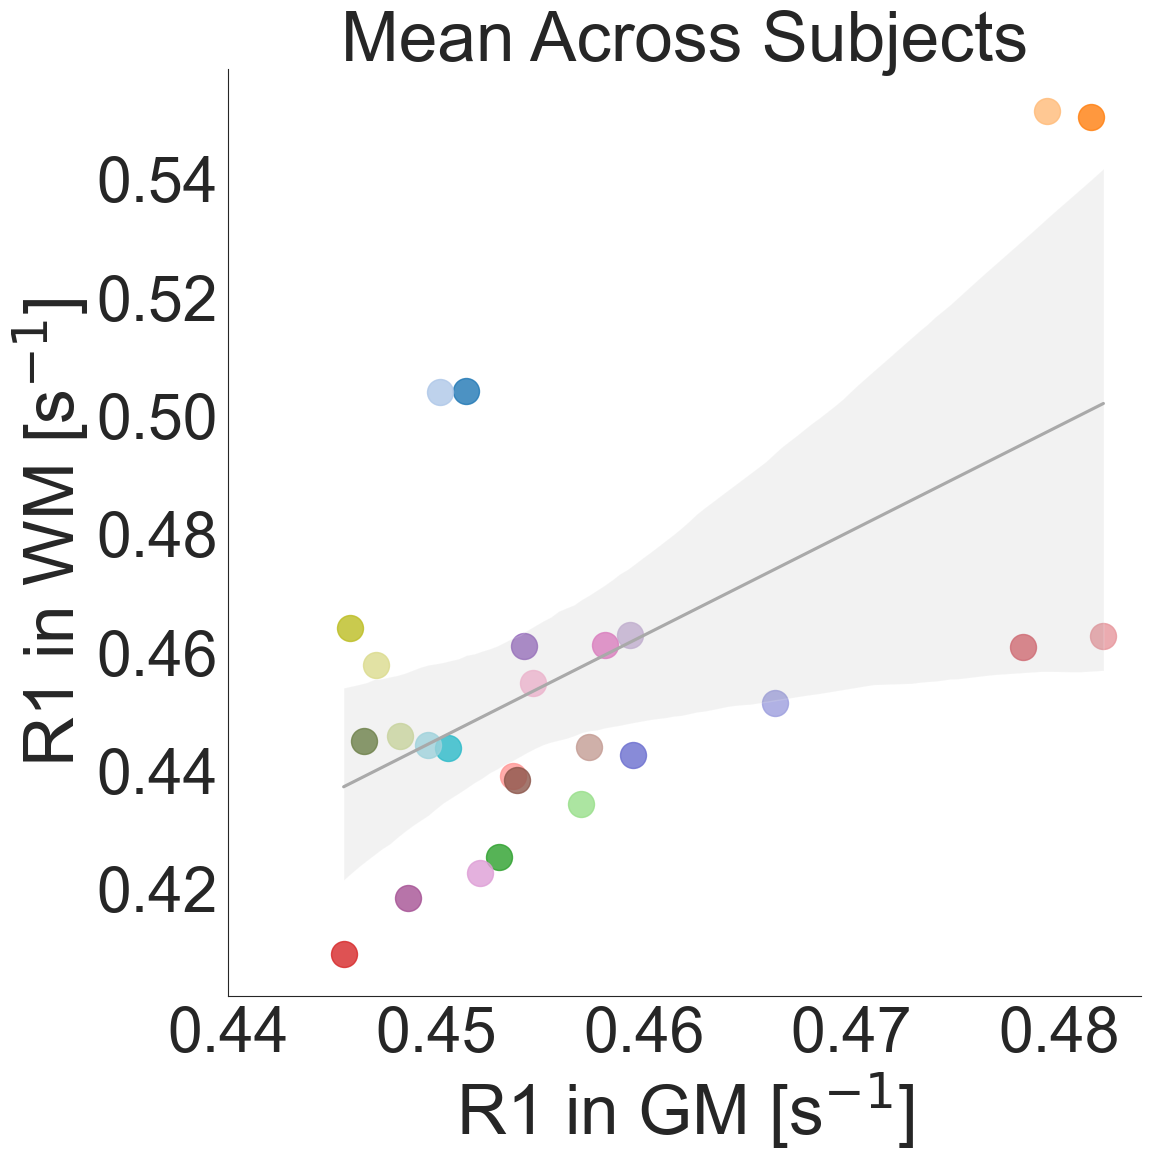

In [9]:
sns.set_style('white');
fig1=sns.lmplot(
    data=R1BothWeAveTract, x='GM_R1', y="R1", hue="tractID", scatter_kws={"s": 350}, height=10, fit_reg=False, palette=color_list_chosen, legend=False)
fig1=sns.regplot(data=R1BothWeAveTract, x='GM_R1', y="R1", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "darkgrey"})
scipy.stats.pearsonr(R1BothWeAveTract['GM_R1'], R1BothWeAveTract['R1'])
#plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=13, handletextpad=0, columnspacing=0.5, frameon=False)
plt.xlabel("R1 in GM [s$^{-1}$]", fontsize=50)
plt.ylabel("R1 in WM [s$^{-1}$]", fontsize=50)
plt.xticks([0.44, 0.45, 0.46, 0.47, 0.48], fontsize=45)
plt.yticks(fontsize=45)
fig1.set_title('Mean Across Subjects', fontsize=50)
plt.savefig('./figures/R1maincorrelationLegende.png', dpi=600, bbox_inches='tight', pad_inches=0.1)

In [10]:
# Compute Pearson r, p, and r² for each subject
results = []
for sub in R1BothWeAveSubject['subjectID'].unique():
    sub_data = R1BothWeAveSubject[R1BothWeAveSubject['subjectID'] == sub]
    r, p_val = stats.pearsonr(sub_data['GM_R1'], sub_data['R1'])
    results.append({
        'subjectID': sub,
        'r2': r**2,
        'p': p_val
    })

# Convert to DataFrame
df_stats = pd.DataFrame(results)
df_stats.to_csv('./outputData/SubjectsStatsR1.csv', index=False)
# Output top-level stats
best_subject = df_stats.loc[df_stats['r2'].idxmax()]
worst_subject = df_stats.loc[df_stats['r2'].idxmin()]
mean_r2 = df_stats['r2'].mean()
mean_p = df_stats['p'].mean()
significant_count = (df_stats['p'] < 0.05).sum()
total_subjects = df_stats['p'].count()

# Display results
print("Best subject:\n", best_subject)
print("Worst subject:\n", worst_subject)
print("Mean p:", mean_p)
print("Mean r2:", mean_r2)
print("Subjects with p < 0.05:", significant_count)
print("Total subjects:", total_subjects)

Best subject:
 subjectID    53.000000
r2            0.509749
p             0.000042
Name: 10, dtype: float64
Worst subject:
 subjectID    32.000000
r2            0.025103
p             0.439491
Name: 5, dtype: float64
Mean p: 0.0443921144757456
Mean r2: 0.25817688634522884
Subjects with p < 0.05: 17
Total subjects: 21


In [11]:
# Use the pandas Series directly for convenience
r2_values = df_stats['r2']

# Compute and print summary statistics
print(f"Mean r²:      {r2_values.mean():.4f}")
print(f"Median r²:    {r2_values.median():.4f}")

try:
    mode_r2 = statistics.mode(r2_values)
    print(f"Mode r²:      {mode_r2:.4f}")
except statistics.StatisticsError:
    print("Mode r²:      No unique mode found")

print(f"Std Dev r²:   {r2_values.std():.4f}")
print(f"Variance r²:  {r2_values.var():.4f}")

# Range function (revised for clarity)
def describe_range(series):
    min_val = series.min()
    max_val = series.max()
    value_range = max_val - min_val
    return min_val, max_val, value_range

r2_min, r2_max, r2_range = describe_range(r2_values)
print(f"Range r²:     min={r2_min:.4f}, max={r2_max:.4f}, range={r2_range:.4f}")

Mean r²:      0.2582
Median r²:    0.2781
Mode r²:      0.2781
Std Dev r²:   0.1152
Variance r²:  0.0133
Range r²:     min=0.0251, max=0.5097, range=0.4846


PearsonRResult(statistic=np.float64(0.7139674129188164), pvalue=np.float64(4.205023047696592e-05))

Text(0.5, 29.140624999999986, 'R1 in GM [s$^{-1}$]')

Text(21.375, 0.5, 'R1 in WM [s$^{-1}$]')

([<matplotlib.axis.YTick at 0x2c1599d90>,
 [Text(0, 0.4, '0.40'),
  Text(0, 0.44, '0.44'),
  Text(0, 0.48, '0.48'),
  Text(0, 0.52, '0.52'),
  Text(0, 0.56, '0.56')])

(array([0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49]),
 [Text(0.43, 0, '0.43'),
  Text(0.44, 0, '0.44'),
  Text(0.45, 0, '0.45'),
  Text(0.45999999999999996, 0, '0.46'),
  Text(0.47, 0, '0.47'),
  Text(0.48, 0, '0.48'),
  Text(0.49, 0, '0.49')])

Text(0.5, 1.0, 'High Correlation')

PearsonRResult(statistic=np.float64(0.15843903911533555), pvalue=np.float64(0.43949081012776836))

Text(0.5, 29.140624999999986, 'R1 in GM [s$^{-1}$]')

Text(21.375, 0.5, 'R1 in WM [s$^{-1}$]')

(array([0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65]),
 [Text(0, 0.35000000000000003, '0.35'),
  Text(0, 0.4, '0.40'),
  Text(0, 0.45000000000000007, '0.45'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.55, '0.55'),
  Text(0, 0.6000000000000001, '0.60'),
  Text(0, 0.6500000000000001, '0.65')])

([<matplotlib.axis.XTick at 0x2a0277cd0>,
 [Text(0.43, 0, '0.43'),
  Text(0.45, 0, '0.45'),
  Text(0.47, 0, '0.47'),
  Text(0.49, 0, '0.49')])

Text(0.5, 1.0, 'Low Correlation')

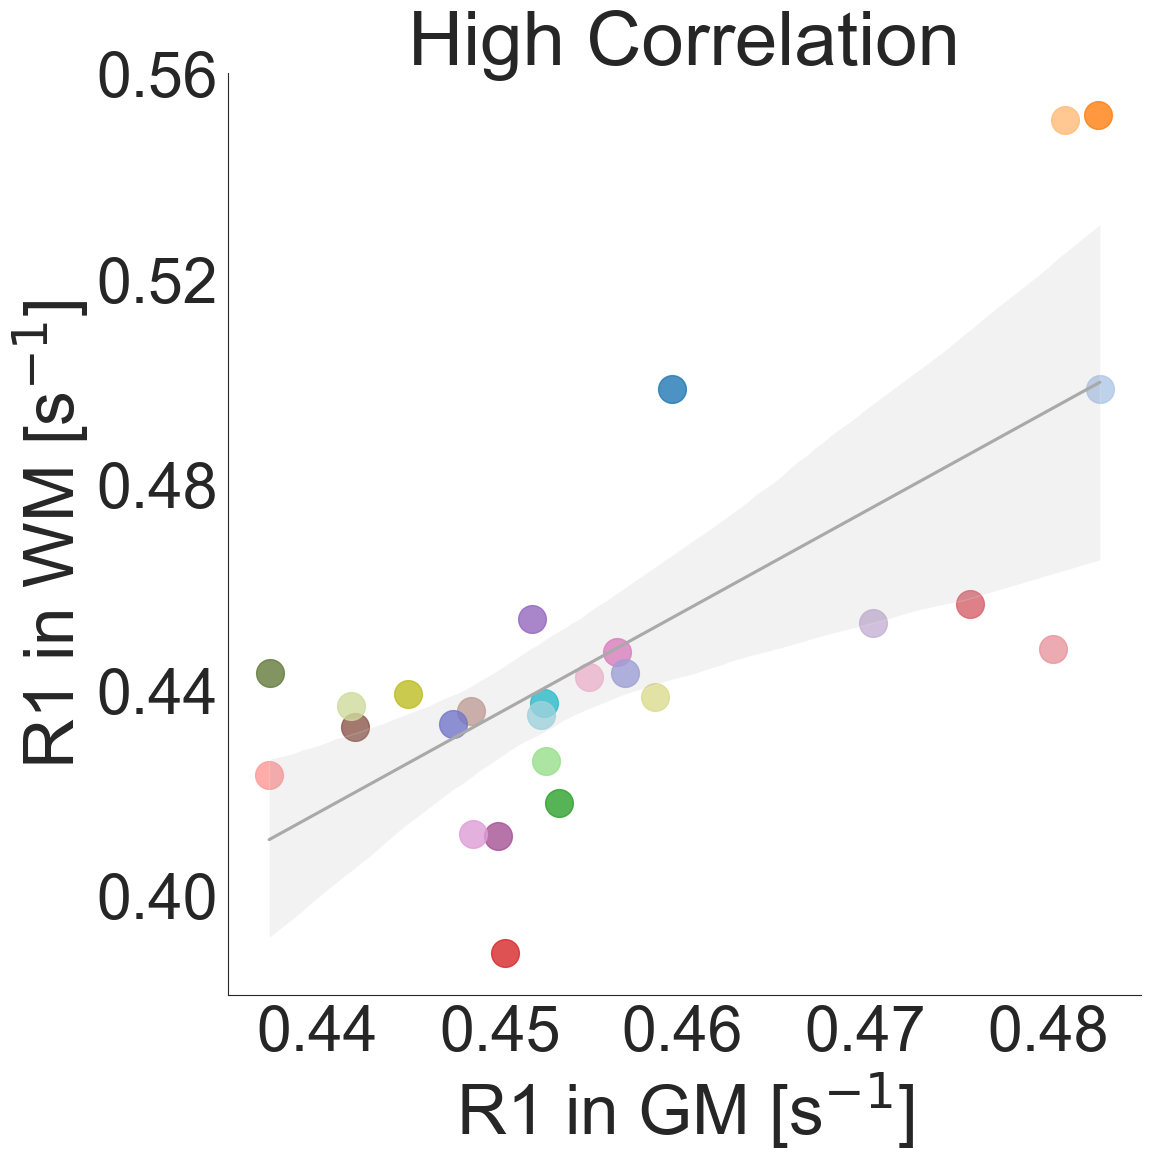

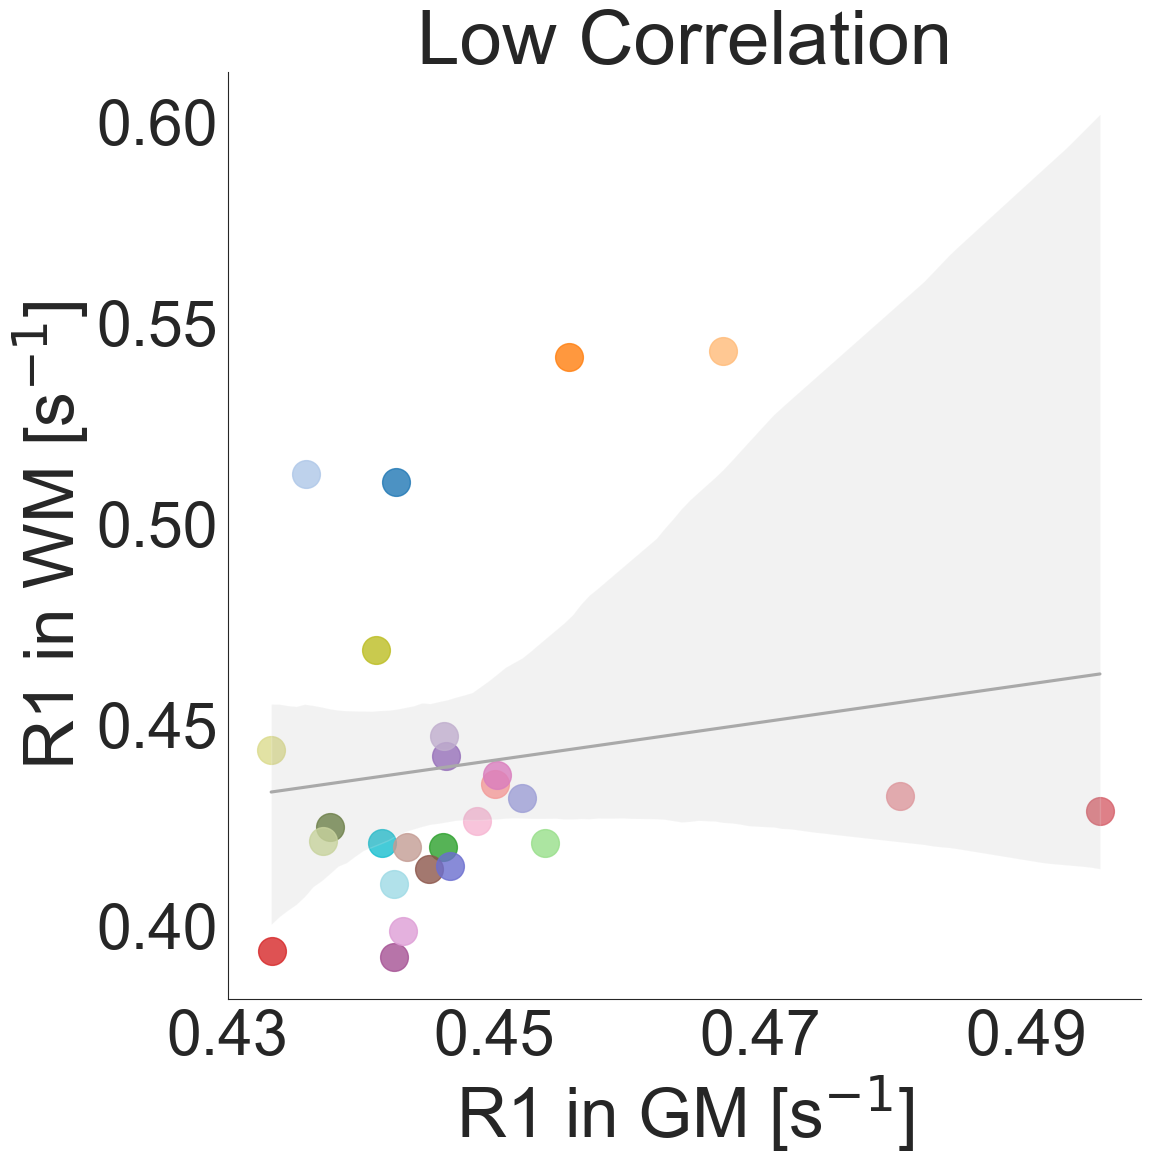

In [12]:
#Plot three example subjects

#Highest r²
DataSub1=R1BothWeAveSubject[(R1BothWeAveSubject['subjectID']==53)]
sns.set_style('white');
fig1=sns.lmplot(
    data=DataSub1, x='GM_R1', y="R1", hue="tractID", scatter_kws={"s": 400}, height=10, fit_reg=False, legend=False, palette=color_list_chosen
)
fig1=sns.regplot(data=DataSub1, x='GM_R1', y="R1", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "darkgrey"})
scipy.stats.pearsonr(DataSub1['GM_R1'], DataSub1['R1'])
plt.xlabel("R1 in GM [s$^{-1}$]", fontsize=50)
plt.ylabel("R1 in WM [s$^{-1}$]", fontsize=50)
plt.yticks([0.40, 0.44, 0.48, 0.52, 0.56], fontsize=45)
plt.xticks(fontsize=45)
fig1.set_title('High Correlation', fontsize=55)
plt.savefig('./figures/R1HighSubject.png', dpi=600, bbox_inches='tight', pad_inches=0.1)


#Lowest r²
DataSub2=R1BothWeAveSubject[(R1BothWeAveSubject['subjectID']==32)]
sns.set_style('white');
fig1=sns.lmplot(
    data=DataSub2, x='GM_R1', y="R1", hue="tractID", scatter_kws={"s": 400}, height=10, fit_reg=False, legend=False, palette=color_list_chosen
)
fig1=sns.regplot(data=DataSub2, x='GM_R1', y="R1", scatter=False, ax=fig1.axes[0, 0], line_kws={"color": "darkgrey"})
scipy.stats.pearsonr(DataSub2['GM_R1'], DataSub2['R1'])
plt.xlabel("R1 in GM [s$^{-1}$]", fontsize=50)
plt.ylabel("R1 in WM [s$^{-1}$]", fontsize=50)
plt.yticks(fontsize=45)
plt.xticks([0.43, 0.45, 0.47, 0.49], fontsize=45)
fig1.set_title('Low Correlation', fontsize=55)
plt.savefig('./figures/R1LowSubject.png', dpi=600, bbox_inches='tight', pad_inches=0.1)